### Imports

In [1]:
import os, sys

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import seaborn as sns
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

from scripts.config import train_set, index_map, LANDMARKS, DATAPATH

## Preprocessing

Landmark Selection:


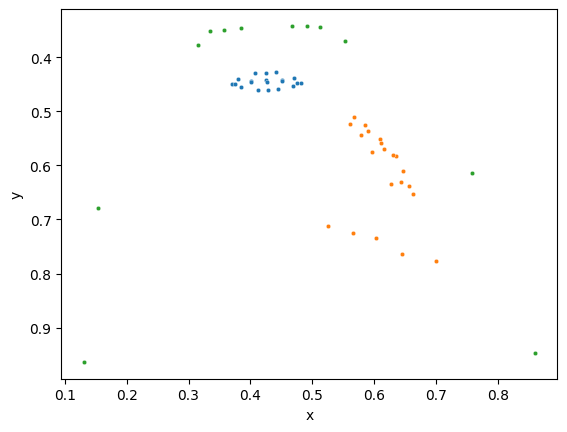

In [3]:
df = pd.read_parquet(DATAPATH + train_set.path.to_list()[4526])
frame = df[df.frame==df.frame[0]].copy()
fig = plt.figure()
for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x[LANDMARKS[landmark]], y=frame.y[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Landmark Selection:')

### Augmentations

Horizontal Flip:


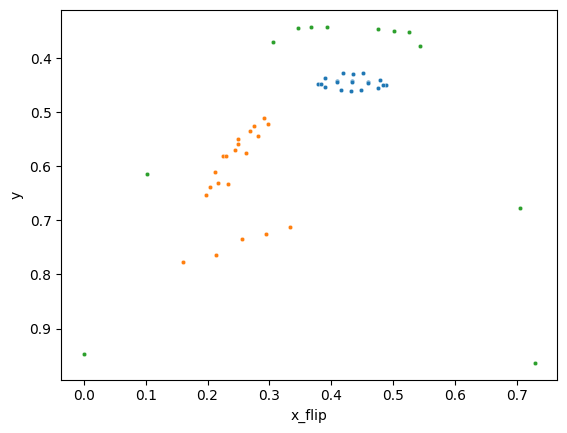

In [4]:
frame['x_flip'] = frame.x.max() - frame.x
for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x_flip[LANDMARKS[landmark]], y=frame.y[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Horizontal Flip:')

Hand Rotation:


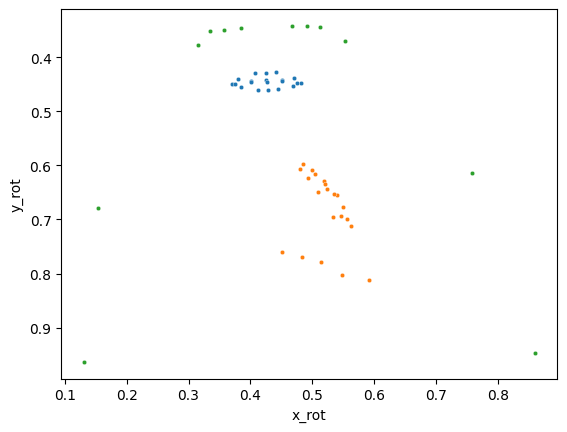

In [5]:
def rotation(frame, mask, rot_center, theta):
    axis = frame.loc[mask] - rot_center
    axis_rot = axis * np.cos(theta) + axis * np.sin(theta)
    return axis_rot + rot_center

elbows = frame.loc[LANDMARKS['pose']]
elbows = elbows.loc[frame.landmark_index.isin((13,14)), ('x', 'y')].values
frame['x_rot'] = frame.x.copy()
frame['y_rot'] = frame.y.copy()

theta = -10 * np.pi / 180
for i, mask in enumerate([LANDMARKS['right_hand'], LANDMARKS['left_hand']]):
    for j, col in enumerate(['x_rot', 'y_rot']):
        theta = -theta if col[0] == 'x' else theta
        frame.loc[mask, col] = rotation(frame, (mask, col[0]), elbows[i,j], theta)

for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x_rot[LANDMARKS[landmark]], y=frame.y_rot[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Hand Rotation:')

Scaling:


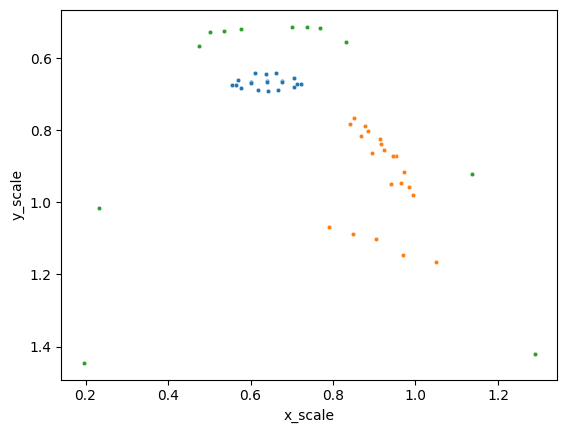

In [6]:
factor = 1.5
frame['x_scale'] = factor * frame.x
frame['y_scale'] = factor * frame.y
frame['z_scale'] = factor * frame.z
for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x_scale[LANDMARKS[landmark]], y=frame.y_scale[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Scaling:')

Horizontal Shear:


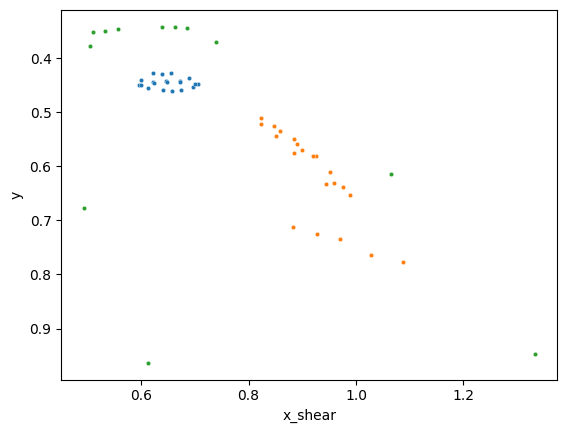

In [7]:
factor = 0.5
frame['x_shear'] = frame.x + factor * frame.y
for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x_shear[LANDMARKS[landmark]], y=frame.y[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Horizontal Shear:')

Vertical Shear:


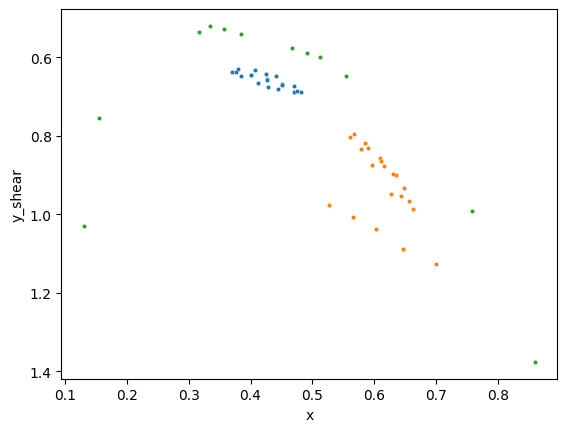

In [8]:
factor = 0.5
frame['y_shear'] = frame.y + factor * frame.x
for landmark in LANDMARKS.keys():
    fig = sns.scatterplot(x=frame.x[LANDMARKS[landmark]], y=frame.y_shear[LANDMARKS[landmark]], s=10)
fig.invert_yaxis()
print('Vertical Shear:')